In [95]:
# DISCLAIMER: DAS FOLGENDE JUPYTER NOTEBOOK IST IN KEINSTER WEISE EINE HOCHPROFESSIONELLE ANALYSE EINES DATENBESTANDES. 
# ES SOLL HIER LEDIGLICH DARUM GEHEN METHODEN AUS DEM BEREICH DATA SCIENCE ZU VERANSCHAULICHEN. INSBESONDERE IST DIESES DOKUMENT
# NICHT DAZU GEDACHT EIN POLITISCHES STATEMENT ABZUGEBEN ODER RATSCHLÄGE BEI ERKRANKUNGEN ZU ERTEILEN. HIER SOLL LEDIGLICH
# DIE ART UND WEISE WIE DATENANALYSE BETRIEBEN WIRD UND WAS DORT SCHIEF GEHEN KANN PRÄSENTIERT WERDEN:


# Herzlich willkommen zu einem neuen Jupyter Notebook von 'The Erium Podcast'. Dieses Mal widmen wir uns dem Thema 
# 'Data Visualizations'. Das System ist dabei ähnlich zu dem eines vorherigen Jupyter Notebooks. Denn diesmal gilt es wieder
# den Fehler/die Ungenauigkeit in der Analyse der Daten zu finden.
# Dieses Dokument ist ein kleines add on zu der Folge "DATA VISUALIZATIONS" von The Erium Podcast.
# Solltet ihr die Folge noch nicht gehört haben, tut das am besten direkt unter theeriumpodcast.de, auf Spotify oder 
# Apple Podcasts. So wird deutlicher was gleich hier passiert.
# Das Dataset stammt von kaggle.com.
# Aber nun genug davon und ran an die Visualisierung.
# Zunächst importieren wir die nötigen Bibliotheken.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
# In dem Dataset geht es diesmal um die Ausbreitung des Coronavirus auf der Welt. Wir möchten dazu ein paar kleine Grafiken machen.
df = pd.read_csv('coronavirus_cleaned_21Jan31Jan.csv')

# Zunächst ist jedoch noch ein wenig Preprocessing notwendig.

# Wir entfernen unnötige für unsere Analyse unnötige Features...
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['lat'], axis=1)
df = df.drop(['lon'], axis=1)

# ...und benennen unsere Achsen um:
new_names = {
    df.columns[0]: 'province_state',
    'Country/Region': 'country_region',
    'Last Update': 'last_update',
    'Confirmed': 'confirmed',
    'Suspected': 'suspected',
    'Recovered': 'recovered',
    'Death': 'death'
}
df = df.rename(new_names, axis = 'columns')

In [97]:
# Unser datenbestand sieht jetzt so aus:
df

province_state country_region          last_update  confirmed  \
0              Hubei          China  2020-01-31 19:00:00     7153.0   
1           Zhejiang          China  2020-01-31 19:00:00      537.0   
2          Guangdong          China  2020-01-31 19:00:00      436.0   
3              Henan          China  2020-01-31 19:00:00      352.0   
4              Hunan          China  2020-01-31 19:00:00      332.0   
5            Jiangxi          China  2020-01-31 19:00:00      240.0   
6          Chongqing          China  2020-01-31 19:00:00      238.0   
7              Anhui          China  2020-01-31 19:00:00      237.0   
8           Shandong          China  2020-01-31 19:00:00      184.0   
9            Sichuan          China  2020-01-31 19:00:00      177.0   
10           Jiangsu          China  2020-01-31 19:00:00      168.0   
11          Shanghai          China  2020-01-31 19:00:00      153.0   
12           Beijing          China  2020-01-31 19:00:00      139.0   
13            Fujian          China  2020-01-31 19:00:00      120.0   
14             Hebei          China  2020-01-31 19:00:00       96.0   
15           Guangxi          China  2020-01-31 19:00:00       88.0   
16           Shaanxi          China  2020-01-31 19:00:00       87.0   
17            Yunnan          China  2020-01-31 19:00:00       83.0   
18          Liaoning          China  2020-01-31 19:00:00       60.0   
19      Heilongjiang          China  2020-01-31 19:00:00       59.0   
20            Hainan          China  2020-01-31 19:00:00       58.0   
21            Shanxi          China  2020-01-31 19:00:00       47.0   
22             Gansu          China  2020-01-31 19:00:00       35.0   
23           Tianjin          China  2020-01-31 19:00:00       32.0   
24           Guizhou          China  2020-01-31 19:00:00       29.0   
25           Ningxia          China  2020-01-31 19:00:00       21.0   
26    Inner Mongolia          China  2020-01-31 19:00:00       20.0   
27          Xinjiang          China  2020-01-31 19:00:00       17.0   
28             Jilin          China  2020-01-31 19:00:00       14.0   
29         Hong Kong      Hong Kong  2020-01-31 19:00:00       13.0   
...              ...            ...                  ...        ...   
1091               0          Japan  2020-01-22 12:00:00        2.0   
1092               0       Thailand  2020-01-22 12:00:00        2.0   
1093               0    South Korea  2020-01-22 12:00:00        1.0   
1094        Shanghai          China  2020-01-21 00:00:00        9.0   
1095          Yunnan          China  2020-01-21 00:00:00        1.0   
1096         Beijing          China  2020-01-21 00:00:00       10.0   
1097          Taiwan         Taiwan  2020-01-21 00:00:00        1.0   
1098           Jilin          China  2020-01-21 00:00:00        0.0   
1099         Sichuan          China  2020-01-21 00:00:00        2.0   
1100         Tianjin          China  2020-01-21 00:00:00        2.0   
1101         Ningxia          China  2020-01-21 00:00:00        0.0   
1102           Anhui          China  2020-01-21 00:00:00        0.0   
1103        Shandong          China  2020-01-21 00:00:00        1.0   
1104       Guangdong          China  2020-01-21 00:00:00       17.0   
1105         Guangxi          China  2020-01-21 00:00:00        0.0   
1106         Jiangxi          China  2020-01-21 00:00:00        2.0   
1107           Henan          China  2020-01-21 00:00:00        1.0   
1108        Zhejiang          China  2020-01-21 00:00:00        5.0   
1109          Hainan          China  2020-01-21 00:00:00        0.0   
1110           Hubei          China  2020-01-21 00:00:00      270.0   
1111           Hunan          China  2020-01-21 00:00:00        1.0   
1112         Guizhou          China  2020-01-21 00:00:00        0.0   
1113        Liaoning          China  2020-01-21 00:00:00        0.0   
1114       Chongqing          China  2020-01-21 00:00:00        5.0   
1115       Hong Kong      Hong

In [98]:
# Wir möchten uns bei unserer Visualisierung auf den Verlauf über die einzelnen Tage konzentrieren. damit uns das leichter fällt
# fügen wir noch eine Spalte hinzu, die uns den in einer für uns passenden Form gibt:
df.last_update.unique()

array(['2020-01-31 19:00:00', '2020-01-31 14:00:00',
       '2020-01-30 21:30:00', '2020-01-30 11:00:00',
       '2020-01-29 21:00:00', '2020-01-29 14:30:00',
       '2020-01-29 13:30:00', '2020-01-28 23:00:00',
       '2020-01-28 18:00:00', '2020-01-28 13:00:00',
       '2020-01-27 20:30:00', '2020-01-27 19:00:00',
       '2020-01-27 09:00:00', '2020-01-26 23:00:00',
       '2020-01-26 11:00:00', '2020-01-25 12:00:00',
       '2020-01-25 00:00:00', '2020-01-24 12:00:00',
       '2020-01-24 00:00:00', '2020-01-23 12:00:00',
       '2020-01-22 12:00:00', '2020-01-21 00:00:00'], dtype=object)

In [99]:
v = np.array(df.last_update)

for i in range(len(v)):
    if v[i] == '2020-01-31 19:00:00' or v[i] == '2020-01-31 14:00:00':
        v[i] = 31
    elif v[i] == '2020-01-30 21:30:00' or v[i] == '2020-01-30 11:00:00':
        v[i] = 30
    elif v[i] == '2020-01-29 21:00:00' or v[i] == '2020-01-29 14:30:00' or v[i] == '2020-01-29 13:30:00':
        v[i] = 29
    elif v[i] == '2020-01-28 23:00:00' or v[i] == '2020-01-28 18:00:00' or v[i] == '2020-01-28 13:00:00':
        v[i] = 28
    elif v[i] == '2020-01-27 20:30:00' or v[i] == '2020-01-27 19:00:00' or v[i] == '2020-01-27 09:00:00':
        v[i] = 27
    elif v[i] == '2020-01-26 23:00:00' or v[i] == '2020-01-26 11:00:00':
        v[i] = 26
    elif v[i] == '2020-01-25 12:00:00' or v[i] == '2020-01-25 00:00:00':
        v[i] = 25
    elif v[i] == '2020-01-24 12:00:00' or v[i] == '2020-01-24 00:00:00':
        v[i] = 24
    elif v[i] == '2020-01-23 12:00:00':
        v[i] = 23
    elif v[i] == '2020-01-22 12:00:00':
        v[i] = 22
    elif v[i] == '2020-01-21 00:00:00':
        v[i] = 21


df = df.join(pd.DataFrame(v))

new_names = {
    df.columns[0]: 'province_state',
    'Country/Region': 'country_region',
    'Last Update': 'last_update',
    'Confirmed': 'confirmed',
    'Suspected': 'suspected',
    'Recovered': 'recovered',
    'Death': 'death',
    0: 'last_update_day'
}
df = df.rename(new_names, axis = 'columns')

In [100]:
df.head()

province_state country_region          last_update  confirmed  suspected  \
0          Hubei          China  2020-01-31 19:00:00     7153.0        0.0   
1       Zhejiang          China  2020-01-31 19:00:00      537.0        0.0   
2      Guangdong          China  2020-01-31 19:00:00      436.0        0.0   
3          Henan          China  2020-01-31 19:00:00      352.0        0.0   
4          Hunan          China  2020-01-31 19:00:00      332.0        0.0   

   recovered  death last_update_day  
0      169.0  249.0              31  
1       14.0    0.0              31  
2       10.0    0.0              31  
3        3.0    2.0              31  
4        3.0    0.0              31

In [101]:
# Da wir die Gesamtentwicklung des Coronavirus in der Welt betrachten möchten, brauchen wir dementsprechend auch die Gesamtzahlen.
# Diese Sammeln wir nun für die jeweiligen Features, um sie anschließend gegen unsere Tage plotten zu können:

days = np.arange(21,32)
total_confirmed = np.arange(11)

for i in range(11):
    total_confirmed[i] = sum(np.array(df[df.last_update_day == i + 21].confirmed))
    
total_suspected = np.arange(11)

for i in range(11):
    total_suspected[i] = sum(np.array(df[df.last_update_day == i + 21].suspected))

total_recovered = np.arange(11)

for i in range(11):
    total_recovered[i] = sum(np.array(df[df.last_update_day == i + 21].recovered))
    
total_death = np.arange(11)

for i in range(11):
    total_death[i] = sum(np.array(df[df.last_update_day == i + 21].death))

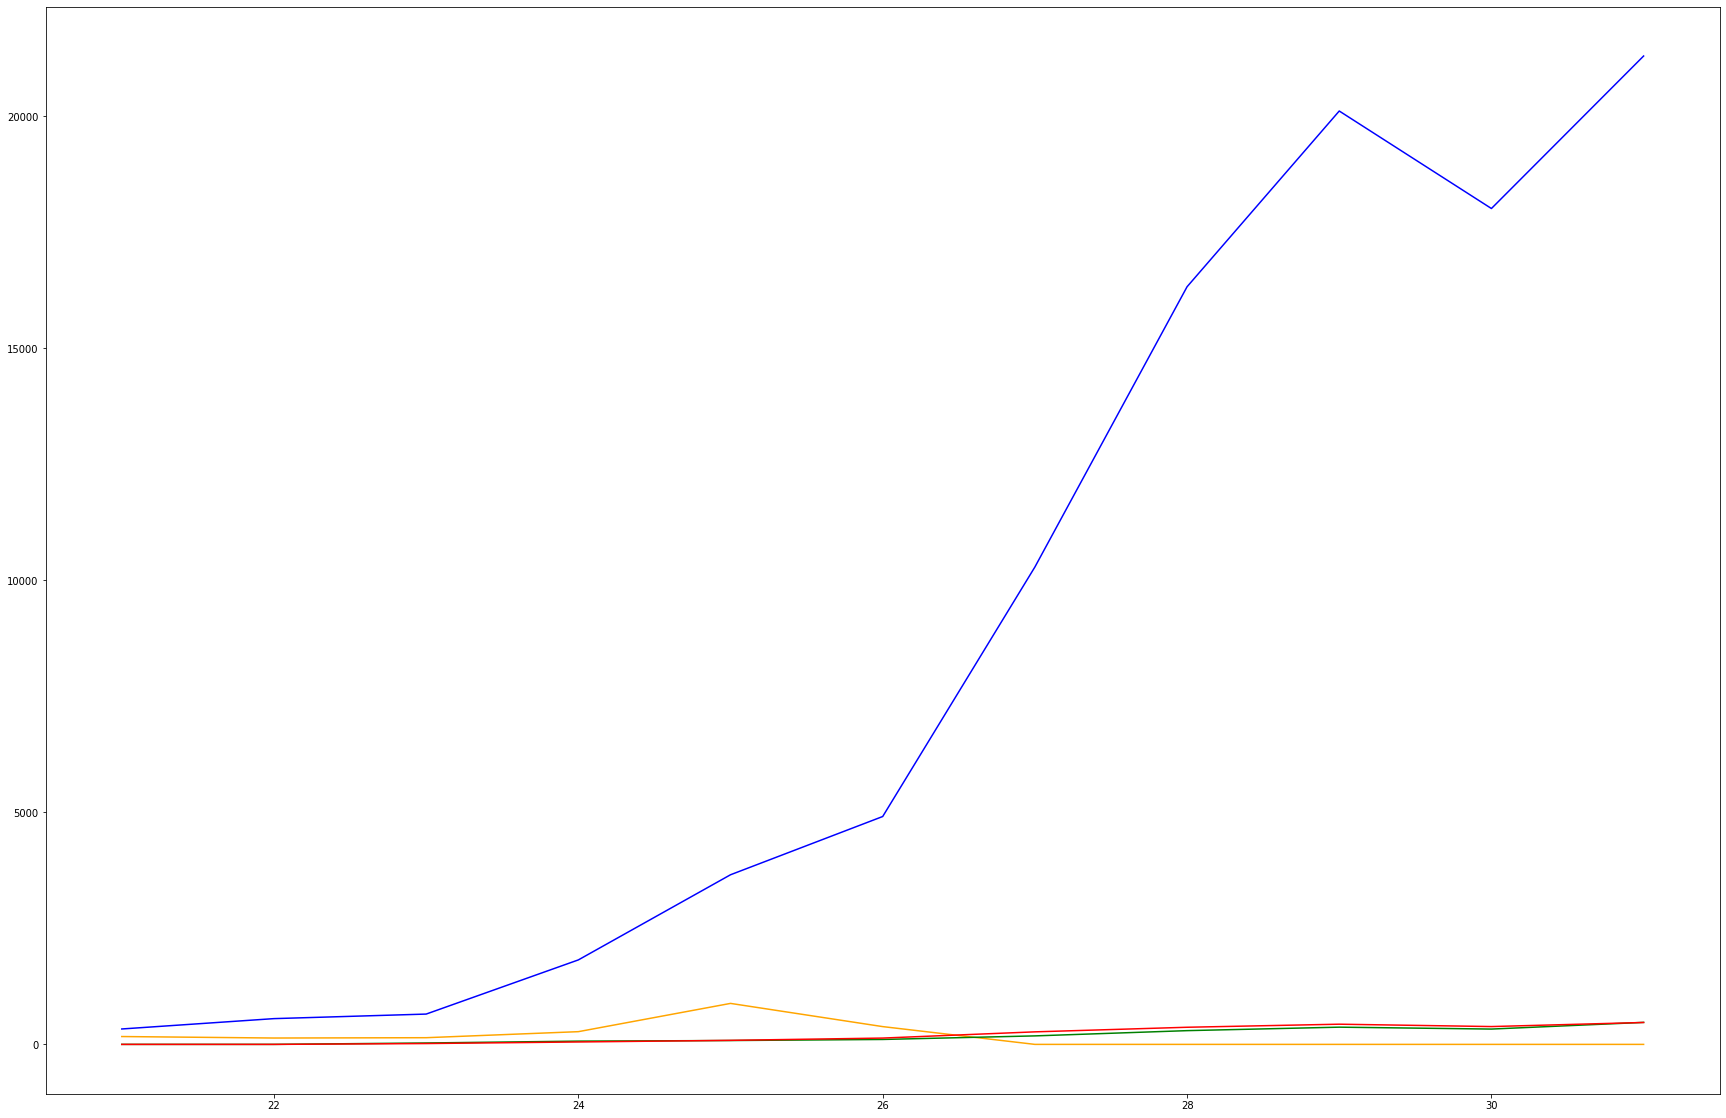

In [102]:
# Schauen wir uns den Plot einaml an:
plt.figure(figsize=(30,20))
plt.plot(days, total_confirmed, color='blue')
plt.plot(days, total_suspected, color='orange')
plt.plot(days, total_recovered, color='green')
plt.plot(days, total_death, color='red')
plt.show()

In [103]:
# Hier lässt sich erkennen, dass die Tage über die Zahl der bestätigten Coronafälle angestiegen ist. Die anderen Variablen 
# blieben immer im gleichen Bereich.

In [104]:
# Jetzt seid ihr an der Reihe! Ihr habt den Fehler entdeckt der hier gemacht wurde und konntet ihn korrigieren?
# Dann lasst es uns wissen wie ihr das gemacht habt
# und schriebt uns direkt an podcast@erium.de, auf LinkedIn, Facebook, Twitter oder Instagram!

# Danke fürs Anschauen dieser Jupyter Notebook Datei und Hören des Podcasts. Seid auch gespannt auf die nächste Folge von 
# The Erium Podcast in der wir euch alles Wissenswerte zu Missing Values erzählen! :D